In [28]:
# TensorFlow and tf.keras
import tensorflow as tf

#Helper libraries
import numpy as np
import matplotlib.pyplot as plot


In [29]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


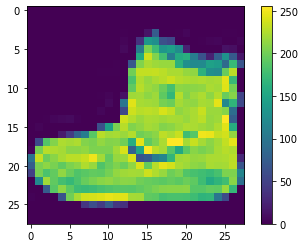

In [31]:
plot.figure()
plot.imshow(train_images[0])
plot.colorbar()
plot.grid(False)
plot.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so divide the values be 255. It's important that the training set and the testing set be preprocessed in the sam way.

In [32]:
train_images = train_images / 255.0

test_images = test_images / 255.0

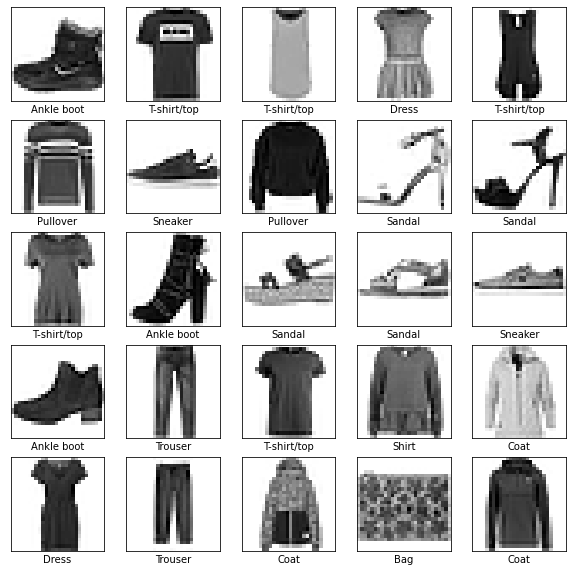

In [38]:
plot.figure(figsize=(10,10))
for i in range(25):
    plot.subplot(5,5,i+1)
    plot.xticks([])
    plot.yticks([])
    plot.grid(False)
    plot.imshow(train_images[i], cmap=plot.cm.binary)
    plot.xlabel(class_names[train_labels[i]])
    
plot.show()

#### Build the model

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the Model

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4953 - accuracy: 0.8259: 
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3738 - accuracy: 0.8657: 0s - loss: 0.3745 - accu
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3376 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3089 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2929 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2776 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2652 - accuracy: 0.9010: 0s - loss: 0.2
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2557 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2452 - accuracy: 0.9087
Epoch 10/10
1875/1875 [===============

### Evaluate accuracy


In [42]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3318 - accuracy: 0.8827 - 969ms/epoch - 3ms/step

Test accuracy: 0.8827000260353088


### Make Predictions


In [43]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(test_images)
predictions

array([[6.4432463e-08, 4.0352020e-09, 1.3460209e-08, ..., 1.4100194e-03,
        7.7618720e-09, 9.9788839e-01],
       [4.3511383e-05, 1.2071195e-10, 9.9939561e-01, ..., 1.6845509e-20,
        2.1984015e-09, 1.4437321e-15],
       [3.7958528e-13, 1.0000000e+00, 5.9496359e-13, ..., 2.8540952e-24,
        1.1808933e-15, 7.0585178e-15],
       ...,
       [5.5863312e-03, 5.6550320e-10, 3.7233200e-05, ..., 9.2521973e-10,
        9.9402618e-01, 1.0923847e-11],
       [3.6997131e-13, 1.0000000e+00, 1.9588248e-14, ..., 1.5505726e-17,
        2.0028632e-12, 3.4616970e-10],
       [1.8034404e-04, 1.3604898e-07, 6.1269740e-05, ..., 4.9661331e-02,
        4.0355703e-04, 1.7804063e-04]], dtype=float32)

In [47]:
np.argmax(predictions[1])

2

In [48]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plot.grid(False)
  plot.xticks([])
  plot.yticks([])

  plot.imshow(img, cmap=plot.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plot.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plot.grid(False)
  plot.xticks(range(10))
  plot.yticks([])
  thisplot = plot.bar(range(10), predictions_array, color="#777777")
  plot.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

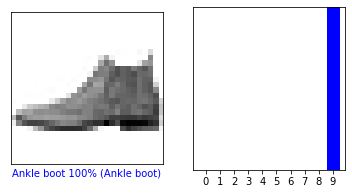

In [50]:
i = 0
plot.figure(figsize=(6,3))
plot.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plot.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plot.show()

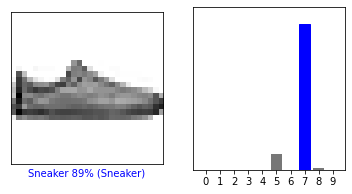

In [51]:
i = 12
plot.figure(figsize=(6,3))
plot.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plot.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plot.show()

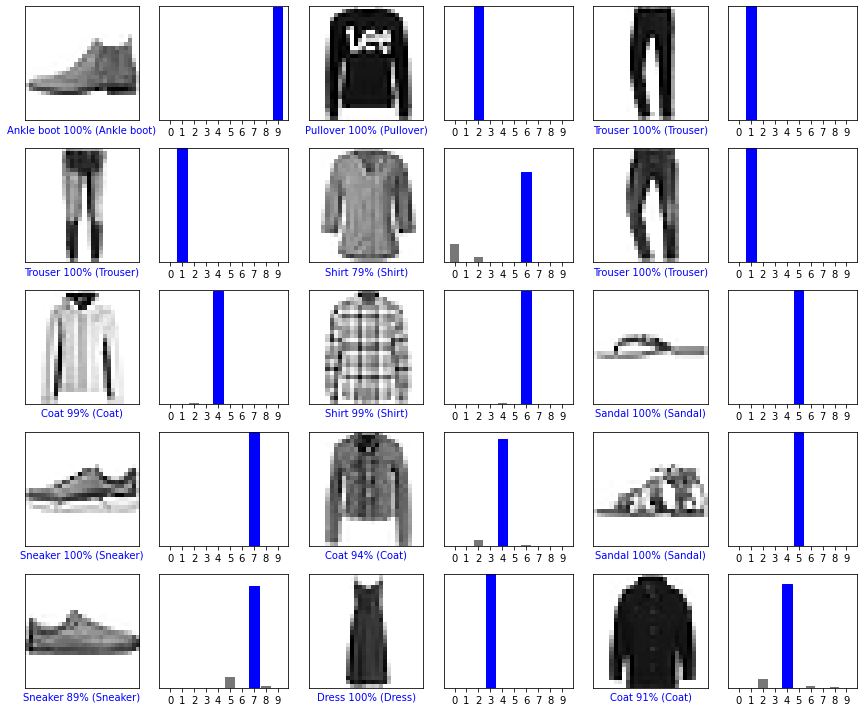

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plot.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plot.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plot.tight_layout()
plot.show()